<a href="https://colab.research.google.com/github/ShreshthSaxena/ML/blob/master/holistically_nested_edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import cv2
# import matplotlib.pyplot as plt
# %matplotlib inline
import pandas as pd
import glob
import os
import math
from google.colab.patches import cv2_imshow

In [0]:
class CropLayer(object):
    def __init__(self, params, blobs):


        self.startX = 0
        self.startY = 0
        self.endX = 0
        self.endY = 0
    def getMemoryShapes(self, inputs):

        (inputShape, targetShape) = (inputs[0], inputs[1])
        (batchSize, numChannels) = (inputShape[0], inputShape[1])
        (H, W) = (targetShape[2], targetShape[3])

        # compute the starting and ending crop coordinates
        self.startX = int((inputShape[3] - targetShape[3]) / 2)
        self.startY = int((inputShape[2] - targetShape[2]) / 2)
        self.endX = self.startX + W
        self.endY = self.startY + H

        # return the shape of the volume (we'll perform the actual
        # crop during the forward pass
        return [[batchSize, numChannels, H, W]]

    def forward(self, inputs):
        return [inputs[0][:, :, self.startY:self.endY,self.startX:self.endX]]

In [0]:
protoPath = "drive/My Drive/hed_model/deploy.prototxt"
modelPath = "drive/My Drive/hed_model/hed_pretrained_bsds.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoPath, modelPath)
cv2.dnn_registerLayer("Crop", CropLayer)

In [0]:
def hedet(img_path):
  im = cv2.imread(img_path)
  (H, W) = im.shape[:2]

  print("[INFO] performing Canny edge detection...")
  gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)
  canny = cv2.Canny(blurred, 30, 150)

  # Edge Detector
  blob = cv2.dnn.blobFromImage(im, scalefactor=1.0, size=(W, H),
                               mean=(104.00698793, 116.66876762, 122.67891434),
                               swapRB=False, crop=False)

  print("[INFO] performing holistically-nested edge detection...")
  net.setInput(blob)
  hed = net.forward()
  hed = cv2.resize(hed[0, 0], (W, H))
  hed = (255 * hed).astype("uint8")
  
  return hed

#   print('original image')
#   cv2_imshow(im)
#   print('canny detection')
#   cv2_imshow(canny)
#   print('hed detection image')
#   cv2_imshow(hed)
#   cv2.waitKey(0)

[INFO] performing Canny edge detection...
[INFO] performing holistically-nested edge detection...
original image


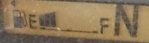

canny detection


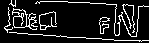

hed detection image


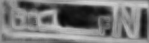

[INFO] performing Canny edge detection...
[INFO] performing holistically-nested edge detection...
original image


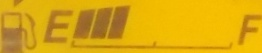

canny detection


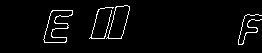

hed detection image


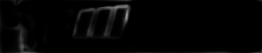

[INFO] performing Canny edge detection...
[INFO] performing holistically-nested edge detection...
original image


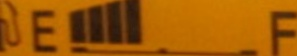

canny detection


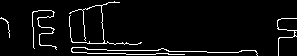

hed detection image


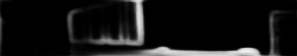

[INFO] performing Canny edge detection...
[INFO] performing holistically-nested edge detection...
original image


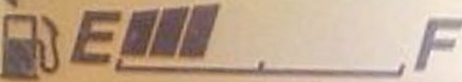

canny detection


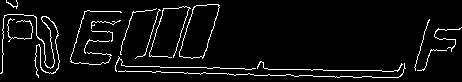

hed detection image


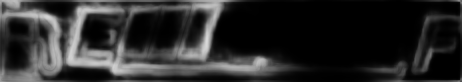

[INFO] performing Canny edge detection...
[INFO] performing holistically-nested edge detection...
original image


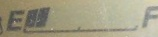

canny detection


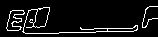

hed detection image


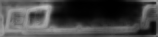

[INFO] performing Canny edge detection...
[INFO] performing holistically-nested edge detection...
original image


canny detection


hed detection image


[INFO] performing Canny edge detection...
[INFO] performing holistically-nested edge detection...
original image


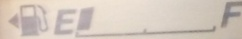

canny detection


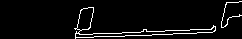

hed detection image


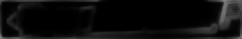

[INFO] performing Canny edge detection...
[INFO] performing holistically-nested edge detection...
original image


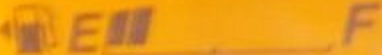

canny detection


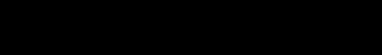

hed detection image


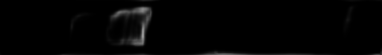

[INFO] performing Canny edge detection...
[INFO] performing holistically-nested edge detection...
original image


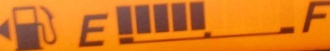

canny detection


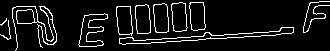

hed detection image


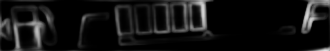

[INFO] performing Canny edge detection...
[INFO] performing holistically-nested edge detection...
original image


canny detection


hed detection image


[INFO] performing Canny edge detection...
[INFO] performing holistically-nested edge detection...
original image


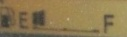

canny detection


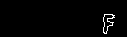

hed detection image


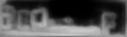

[INFO] performing Canny edge detection...
[INFO] performing holistically-nested edge detection...
original image


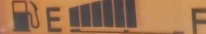

canny detection


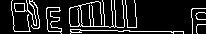

hed detection image


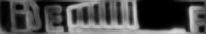

In [0]:
path = '/content/drive/My Drive/fm_straight_extracts'
for img in os.listdir(path):
  img_path = os.path.join(path,img)
  cv2_imshow(hed(img_path))

Image:  txt_mudit_b11_43.jpg


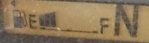

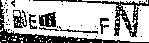

Inverted


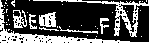

Image:  txt_mudit_b11_748.jpg


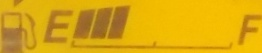

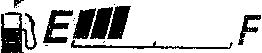

Inverted


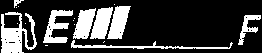

Image:  txt_mudit_b11_11505.jpg


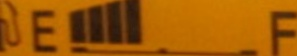

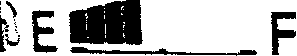

Inverted


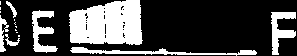

Image:  txt_mudit_b11_11957.jpg


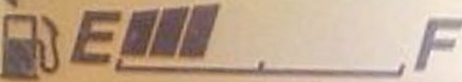

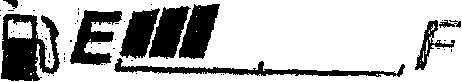

Inverted


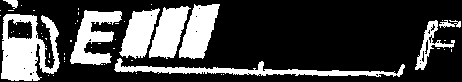

Image:  txt_mudit_b11_11990.jpg


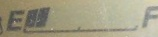

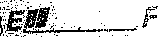

Inverted


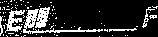

Image:  txt_mudit_b11_11998.jpg


Inverted


Image:  txt_mudit_b11_11982.jpg


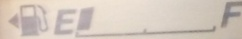

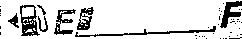

Inverted


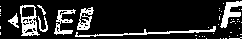

Image:  txt_mudit_b11_11988.jpg


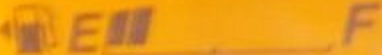

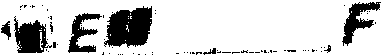

Inverted


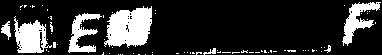

Image:  txt_mudit_b11_12016.jpg


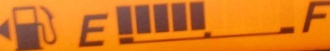

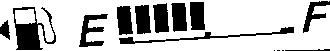

Inverted


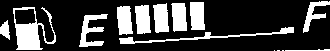

Image:  txt_mudit_b11_12024.jpg


Inverted


Image:  txt_mudit_b11_12025.jpg


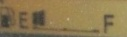

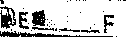

Inverted


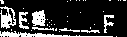

Image:  txt_mudit_b11_12019.jpg


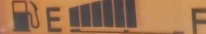

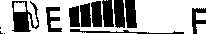

Inverted


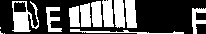

In [0]:
path = '/content/drive/My Drive/fm_straight_extracts'
for img in os.listdir(path):
  img_path = os.path.join(path,img)
  eimg = cv2.imread(img_path)
  print('Image: ',img )
  cv2_imshow(eimg)
  #Sharpen
  kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
  simg = cv2.filter2D(eimg, -1, kernel)
  # convert to HSV
  hsv_image = cv2.cvtColor(simg, cv2.COLOR_BGR2HSV)
  # Threshold
  threshold, binary_image = cv2.threshold(hsv_image[:, :, 2], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  cv2_imshow(binary_image)
  binary_image = (255-binary_image)
  print('Inverted')
  cv2_imshow(binary_image)